In [1]:
# 1st import the package and check its version
import MTM
print("MTM version : ", MTM.__version__)

from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

MTM version :  1.5.2


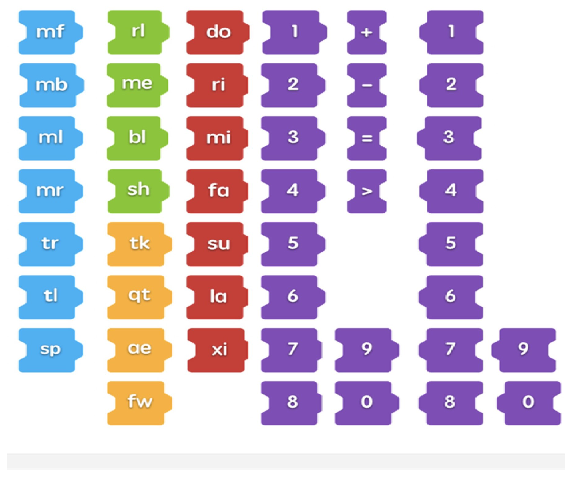

In [3]:

URL = 'puzzlev4.jpg'
image = io.imread(URL)
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(image, cmap="gray")

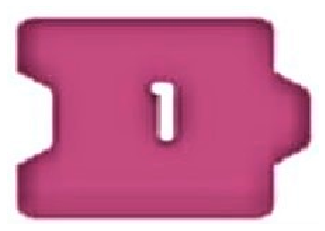

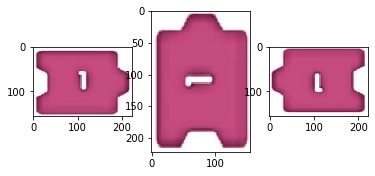

In [29]:

temp0 = cv2.imread('./icons/1.jpg') # with well 49 
plt.axis("off")
plt.imshow(temp0, cmap="gray")

listTemplate = [("0", temp0)]

# Initialise figure
f, axarr = plt.subplots(1,3)
axarr[0].imshow(temp0, cmap="gray")

for i,angle in enumerate([90,180]):
    rotated = np.rot90(temp0, k=i+1) # NB: rotate not good here, turns into float!
    listTemplate.append( (str(angle), rotated ) )
    axarr[i+1].imshow(rotated, cmap="gray")

In [30]:

Hits = matchTemplates(listTemplate, image, N_object=1, score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0.1)
print(Hits)

  TemplateName                BBox     Score
0            0  (826, 6, 222, 155)  0.910347


In [31]:
Overlay1 = drawBoxesOnRGB(image, Hits, boxThickness=5)

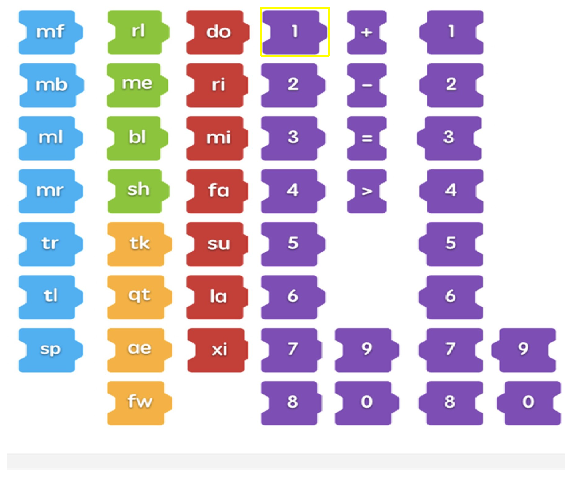

In [32]:
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(Overlay1)

In [6]:
import cv2
import numpy as np
import csv

# reading the image
image = cv2.imread("puzzlev4.jpg")

edged = cv2.Canny(image, 10, 250)
#cv2.imshow("Edges", edged)
#cv2.waitKey(0)

# applying closing function
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
#cv2.imshow("Closed", closed)
#cv2.waitKey(0)

# finding_contours
(cnts, hier) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


print("Number of Contours found = " + str(len(cnts)))




Number of Contours found = 47


In [7]:
idx = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    
    if w>50 and h>50:
        
        idx+=1
        new_img = image[y:y+h, x:x+w]
        ae = cv2.imwrite('./crop/'+str(idx) + '.png', new_img)
        
        img = cv2.imread('./crop/'+str(idx) + '.png')
    
        threshold = 0.7
        res = cv2.matchTemplate(image, img, cv2.TM_CCOEFF_NORMED)
        
        (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(res)
       
        
        # Mapping ClassID to traffic sign names
        signs = []
        with open('popop.txt', 'r') as csvfile:
            signnames = csv.reader(csvfile, delimiter=',')
            next(signnames, None)
            for row in signnames:
                signs.append(row[1])
            csvfile.close()
    print (signs[idx])
        

8
0
8
fw
9
7
9
7
xi
ae
sp
6
6
la
qt
tl
5
5
su
tk
tr
>
>
4
4
fa
sh
mr
3
=
3
mi
bl
ml
2
-
2
ri
me
mb
1
+
1
do
rl
mf


IndexError: list index out of range